In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

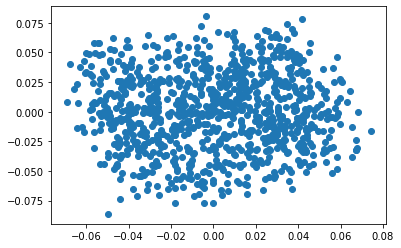

In [2]:
# PCA performed by plink in bash

# plot PCA

evector= pd.read_csv("plink.eigenvec",header=None,sep=' ')

fig, ax = plt.subplots()
ax.scatter(x = evector[2], y = evector[3])

In [8]:
# visualize allele freq spectrum
file=open('cleaned_vcf.txt','r')
freq=[]
for line in file.readlines():
    if "AF=" in line:
        AF=line.split("\t")[7]
    if "," in AF: 
        continue
    freq.append(float(line.split("\t")[7].strip("AF=")))



(array([1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 7.000e+00,
        1.000e+01, 5.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 7.000e+00, 1.000e+01, 1.300e+01,
        9.400e+01, 3.340e+02, 6.530e+02, 1.234e+03, 1.923e+03, 2.416e+03,
        2.938e+03, 2.967e+03, 2.127e+03, 8.470e+02, 2.180e+02, 4.700e+01,
        4.600e+01, 5.400e+01, 2.000e+01, 5.000e+00, 1.000e+00, 5.000e+00,
        5.000e+00, 9.000e+00, 1.500e+01, 1.200e+01, 6.900e+01, 3.600e+01,
        9.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

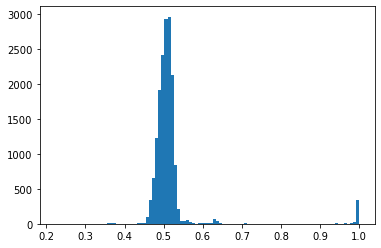

In [12]:
plt.hist(freq, bins=100)

In [17]:
# manhattan plots and qq plots for phenotypes
gwas = pd.read_csv("plink.Hydrogen_Peroxide.qassoc", sep = "\s+")
gwas['logP'] = -1 * np.log10(gwas['P'])
gwas['snp_index'] = range(len(gwas))
gwas

,CHR,SNP,BP,NMISS,BETA,SE,R2,T,P,logP,snp_index
0,1,.,1074,710,-0.12850,0.2100,0.000528,-0.6118,0.5408,0.266963,0
1,1,.,1101,713,-0.08308,0.2193,0.000202,-0.3788,0.7049,0.151872,1
2,1,.,1334,715,-0.07337,0.1964,0.000196,-0.3736,0.7088,0.149476,2
3,1,.,2223,546,0.04622,0.1904,0.000108,0.2427,0.8083,0.092427,3
4,1,.,2323,711,0.05964,0.2226,0.000101,0.2679,0.7888,0.103033,4
...,...,...,...,...,...,...,...,...,...,...,...
16619,16,.,942573,764,-0.16030,0.2464,0.000555,-0.6503,0.5157,0.287603,16619
16620,16,.,942580,766,0.14670,0.2755,0.000371,0.5326,0.5944,0.225921,16620
16621,16,.,942589,765,0.13880,0.2696,0.000347,0.5147,0.6069,0.216883,16621
16622,16,.,942644,759,-0.18370,0.2608,0.000655,-0.7045,0.4813,0.317584,16622


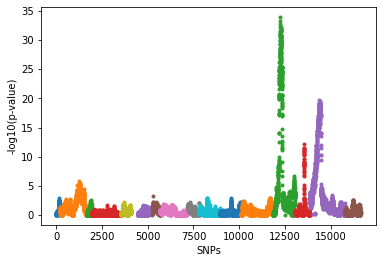

In [18]:
gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots()

for chr in range(1, 23): 
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')

plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
    
plt.show()
